# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Main File

In [2]:
df = pd.read_csv('/content/covid_19_data.csv')

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Clean the Dataset

Convert date column

In [3]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

Fix missing values

In [4]:
df.fillna(0, inplace=True)

# Create Daily Aggregated Dataset (Global)

In [5]:
daily = df.groupby('ObservationDate')[['Confirmed','Deaths','Recovered']].sum().reset_index()
daily.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0


# Plot Growth Trends

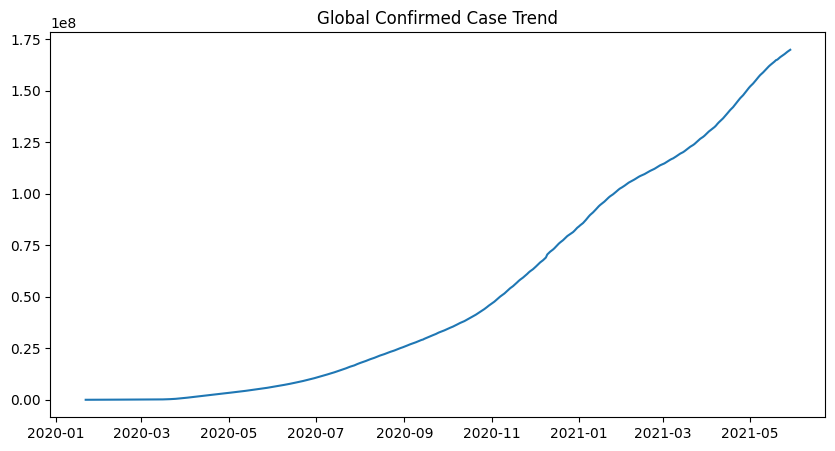

In [6]:
plt.figure(figsize=(10,5))
plt.plot(daily['ObservationDate'], daily['Confirmed'])
plt.title("Global Confirmed Case Trend")
plt.show()

# Prepare Data for Forecasting

In [7]:
ts = daily[['ObservationDate','Confirmed']]
ts = ts.rename(columns={'ObservationDate':'ds', 'Confirmed':'y'})

# Time-Series Forecasting (Prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


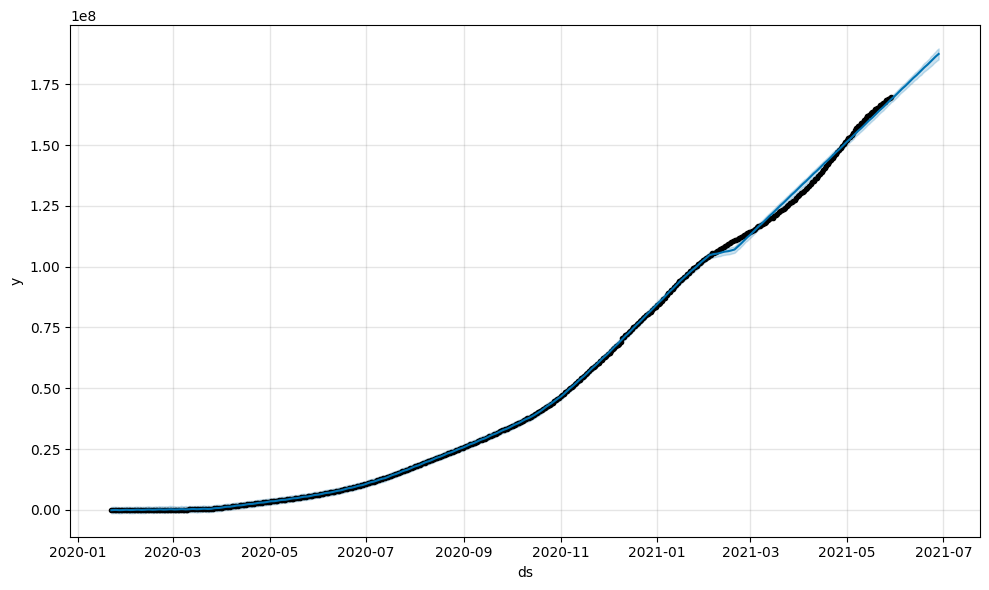

In [8]:
from prophet import Prophet

model = Prophet()
model.fit(ts)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()